<a href="https://colab.research.google.com/github/monsegutier/Grupo4-PP1--Proyecto-ML/blob/visualizaciones/Grafico.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>



# Analisis DataSet - Heart Atack




## Descripcion caracteristicas

**Aim :** predecir el resultado de un ataque cardíaco

Features:

**Age :** Edad del paciente

**Sex :** Sexo del paciente.

**cp :** tipo de dolor en el pecho:

Valor 0: angina típica

Valor 1: angina atípica

Valor 2: dolor no anginoso

Valor 3: asintomático


**trtbps :** presión arterial en reposo (en mm Hg)

**chol :** colesterol en mg/dl obtenido mediante el sensor de IMC

**fbs :** (azúcar en sangre en ayunas > 120 mg/dl)

1 = verdadero

0 = falso

**rest_ecg :** resultados electrocardiográficos en reposo:

Valor 0: normal

Valor 1: tener anomalía de la onda ST-T (inversiones de la onda T y/o elevación o depresión del ST > 0,05 mV)

Valor 2: muestra hipertrofia ventricular izquierda probable o definitiva según los criterios de Estes

**thalach :** frecuencia cardíaca máxima alcanzada.

**exang :** angina inducida por el ejercicio:

1 = si

0 = no

**oldpeak :** depresión del ST inducida por el ejercicio en relación con el reposo.

Depresión del ST: un tipo de anomalía del segmento ST. El segmento ST es la parte plana e isoeléctrica del ECG y representa el intervalo entre la despolarización y la repolarización ventricular.


**slp :** la pendiente del segmento ST del ejercicio máximo

0 = sin pendiente

1 = plano

2 = descendente

**caa :** number of major vessels (0-3)
thall - Thalium Stress Test result ~ (0,3)

**thall :** Talasemia(es un trastorno sanguíneo genético que se caracteriza por una tasa de hemoglobina más baja de lo normal.)

0 = nulo

1 = defecto reparado

2 = normales

3 = defecto reversible

**output :** diagnóstico de enfermedad cardíaca (estado de enfermedad angiográfica)

0: < 50% de estrechamiento del diámetro. menos posibilidades de enfermedad cardíaca

1: > 50% de estrechamiento del diámetro. más posibilidades de sufrir enfermedades cardíacas

## Imports y carga Dataset

In [ ]:
!pip install ydata_profiling
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import plotly.express as px


from ydata_profiling import ProfileReport

# df = pd.read_csv('/content/heart.csv')

from google.colab import files
import pandas as pd
import io  # Importa el módulo io

# Para subir archivos de la pc

# # Permite a los usuarios seleccionar un archivo CSV desde su PC
# uploaded = files.upload()

# # Obtiene el nombre del archivo cargado
# file_name = list(uploaded.keys())[0]

# # Carga el archivo CSV en un DataFrame de Pandas
# df = pd.read_csv(io.StringIO(uploaded[file_name].decode('utf-8')))

# https://raw.githubusercontent.com/crlsh/datasets/main/heart.csv



# Reemplaza esta URL con la URL de tu archivo CSV en GitHub
github_url = 'https://raw.githubusercontent.com/crlsh/datasets/main/heart.csv'

# Carga el archivo CSV desde la URL en un DataFrame
df = pd.read_csv(github_url)

# Info dataset :


print(df.head)
print("")
# columnas y tipos de datos
print(df.columns)
print("")
# Obtener los tipos de datos de cada columna
print ("nombre caracteristicas")
data_types = df.dtypes
print ("")

# Imprimir los tipos de datos
print ("Tipo de datos")
print(data_types)

<bound method NDFrame.head of      age  sex  cp  trtbps  chol  fbs  restecg  thalachh  exng  oldpeak  slp  \
0     63    1   3     145   233    1        0       150     0      2.3    0   
1     37    1   2     130   250    0        1       187     0      3.5    0   
2     41    0   1     130   204    0        0       172     0      1.4    2   
3     56    1   1     120   236    0        1       178     0      0.8    2   
4     57    0   0     120   354    0        1       163     1      0.6    2   
..   ...  ...  ..     ...   ...  ...      ...       ...   ...      ...  ...   
298   57    0   0     140   241    0        1       123     1      0.2    1   
299   45    1   3     110   264    0        1       132     0      1.2    1   
300   68    1   0     144   193    1        1       141     0      3.4    1   
301   57    1   0     130   131    0        1       115     1      1.2    1   
302   57    0   1     130   236    0        0       174     0      0.0    1   

     caa  thall  outp

#Graficos

Estadísticas descriptivas para Age y trtbps:
              age      trtbps
count  303.000000  303.000000
mean    54.366337  131.623762
std      9.082101   17.538143
min     29.000000   94.000000
25%     47.500000  120.000000
50%     55.000000  130.000000
75%     61.000000  140.000000
max     77.000000  200.000000

Tabla de frecuencia para Sex:
1    207
0     96
Name: sex, dtype: int64

Tabla de frecuencia para cp:
0    143
2     87
1     50
3     23
Name: cp, dtype: int64


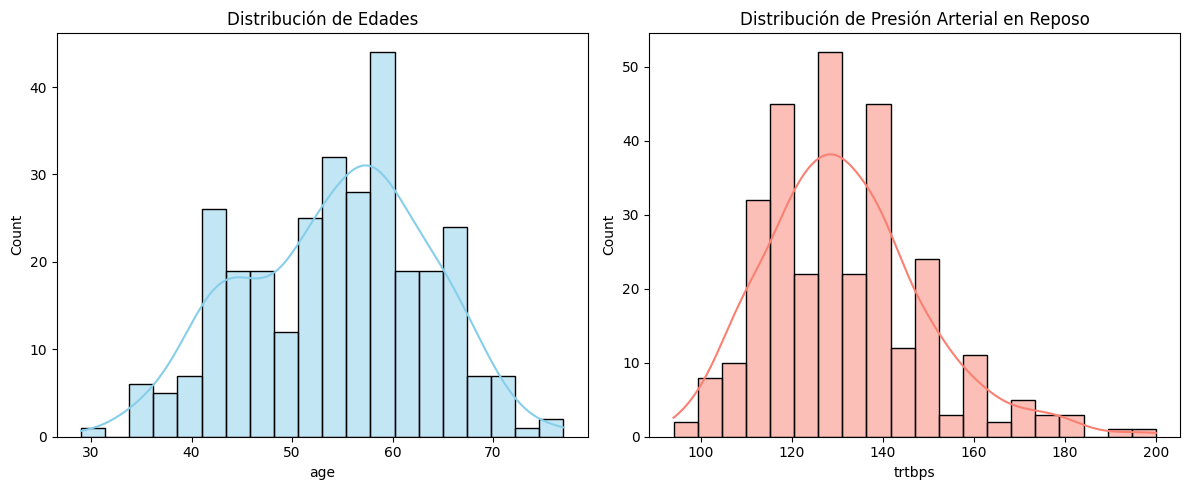

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
# Estadísticas descriptivas para las variables numéricas (Age y trtbps)
estadisticas_numericas = df[['age', 'trtbps']].describe()

# Tablas de frecuencia para las variables categóricas (Sex y cp)
tabla_frecuencia_sex = df['sex'].value_counts()
tabla_frecuencia_cp = df['cp'].value_counts()
print("Estadísticas descriptivas para Age y trtbps:")
print(estadisticas_numericas)
print("\nTabla de frecuencia para Sex:")
print(tabla_frecuencia_sex)
print("\nTabla de frecuencia para cp:")
print(tabla_frecuencia_cp)

# Histogramas para `Age` y `trtbps`
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
sns.histplot(df['age'], bins=20, kde=True, color='skyblue')
plt.title('Distribución de Edades')

plt.subplot(1, 2, 2)
sns.histplot(df['trtbps'], bins=20, kde=True, color='salmon')
plt.title('Distribución de Presión Arterial en Reposo')
plt.tight_layout()

plt.show()

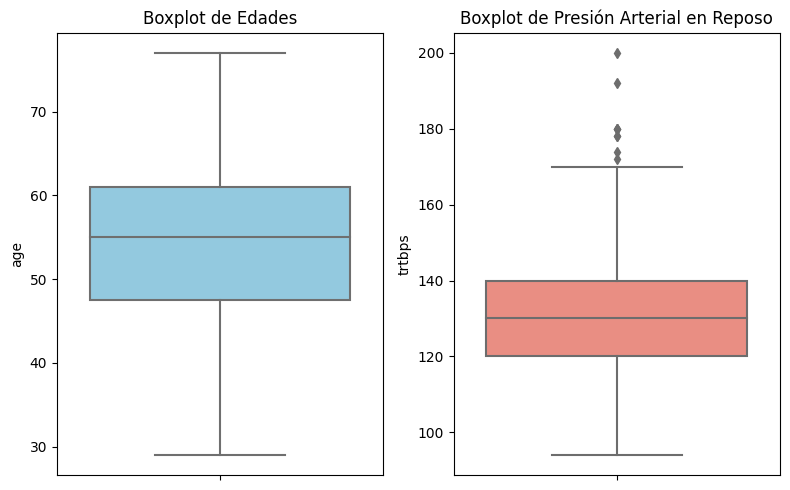

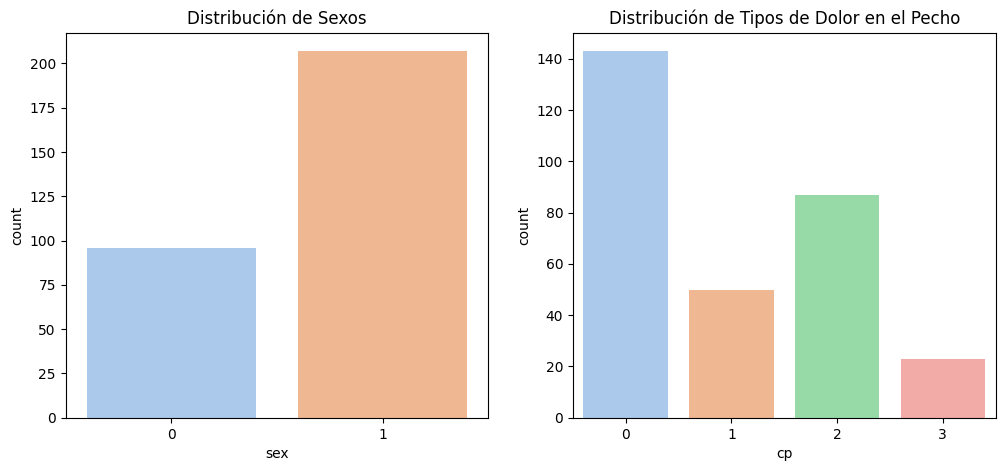

In [ ]:
plt.figure(figsize=(8, 5))

# Boxplot para `Age`
plt.subplot(1, 2, 1)
sns.boxplot(y='age', data=df, color='skyblue')
plt.title('Boxplot de Edades')

# Boxplot para `trtbps`
plt.subplot(1, 2, 2)
sns.boxplot(y='trtbps', data=df, color='salmon')
plt.title('Boxplot de Presión Arterial en Reposo')
plt.tight_layout()

plt.show()
#Gráficos para Variables Categóricas (Sex y cp)
#Gráfico de Barras para Frecuencias

plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
sns.countplot(x='sex', data=df, palette='pastel')
plt.title('Distribución de Sexos')

plt.subplot(1, 2, 2)
sns.countplot(x='cp', data=df, palette='pastel')
plt.title('Distribución de Tipos de Dolor en el Pecho')

plt.show()


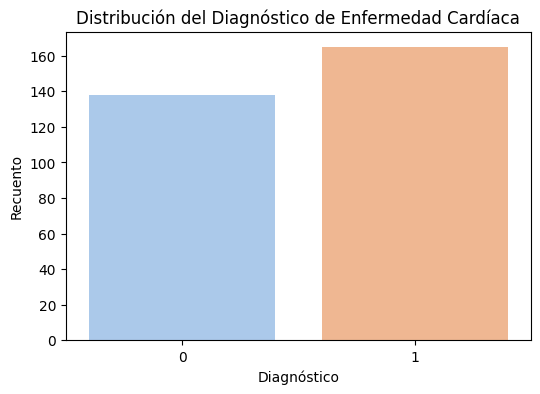

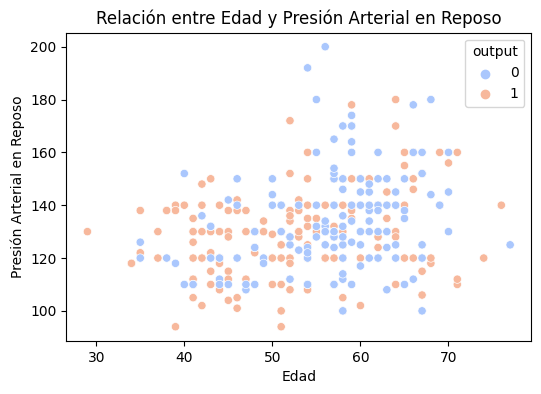

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns



# Gráfico de barras para la distribución del diagnóstico de enfermedad cardíaca
plt.figure(figsize=(6, 4))
sns.countplot(x='output', data=df, palette='pastel')
plt.title('Distribución del Diagnóstico de Enfermedad Cardíaca')
plt.xlabel('Diagnóstico')
plt.ylabel('Recuento')
plt.show()

# Gráfico de dispersión para Edad y Presión Arterial en Reposo
plt.figure(figsize=(6, 4))
sns.scatterplot(x='age', y='trtbps', hue='output', data=df, palette='coolwarm')
plt.title('Relación entre Edad y Presión Arterial en Reposo')
plt.xlabel('Edad')
plt.ylabel('Presión Arterial en Reposo')
plt.show()